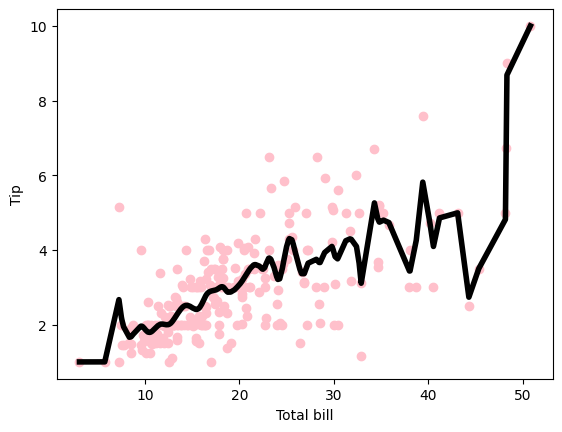

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def kernel(point, xmat, k):
  m, n = np.shape(xmat)
  weights = np.mat(np.eye((m))) # this function act as exponent
  for j in range(m):
    diff = point - X[j]
    weights[j, j] = np.exp(diff * diff.T/(-2.0 * k**2)) # calculate weight
  return weights

def localWeight(point, xmat, ymat, k):
  wei = kernel(point, xmat, k)
  W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T))
  return W

def localWeightRegression(xmat, ymat, k):
  m, n = np.shape(xmat)
  ypred = np.zeros(m)
  for i in range(m):
    ypred[i] = xmat[i] * localWeight(xmat[i], xmat, ymat, k)
  return ypred

# load data points
data = pd.read_csv('10-dataset.csv')
bill = np.array(data.total_bill) # use only bill and tips
tip = np.array(data.tip)

# preparing and add 1 in bill
mbill = np.mat(bill) # .mat convert nd array to 2D array
mtip =  np.mat(tip)

m = np.shape(mbill)[1] # returns shape of the matrix
one = np.mat(np.ones(m)) # returns array with n one
X = np.hstack((one.T, mbill.T)) # stack sequence of input array horizontal

# set k here
ypred = localWeightRegression(X, mtip, 0.5)
SortIndex = X[:, 1].argsort(0) # index of the smallest
xsort = X[SortIndex][:, 0]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(bill, tip, color = 'pink')
ax.plot(xsort[:, 1], ypred[SortIndex], color = 'black', linewidth = 4)
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show();

